In [1]:
import numpy as np
import pandas as pd
from helpers import get_file_name
import matplotlib.pyplot as plt

In [2]:
def plot(base, DATE, name):
    fig, axs = plt.subplots(ncols=2, figsize=(10,4.6))

    for storage in ['0.01', '0.1', '1', '10', '100']:
        f = get_file_name(base.replace('XXX', storage), DATE, True)
        print(f)
        df = pd.read_csv(f)

        axs[0].plot(df['var cost unmet demand ($/kWh)'], 
            df['var cost unmet demand ($/kWh)'] * df['dispatch unmet demand (kW)'],
            label='storage cost: '+storage+' ($/kWh)')
        axs[1].plot(df['var cost unmet demand ($/kWh)'], 
           df['capacity storage (kWh)'],
           label='storage capacity: '+storage+' (kWh)')
    for ax in axs:
        ax.legend()
        ax.set_xlabel('price cap (old VoLL), ($/kWh)')
        ax.set_xscale('log')
        ax.set_yscale('log')

    axs[0].set_ylabel('cost of unmet demand\n(old economic damage) ($/kWh)')
    axs[1].set_ylabel('capacity storage (kWh)')
    plt.suptitle(name)
    plt.savefig(f'../figures2/{name}_log.png')
    for i, ax in enumerate(axs):
        ax.set_yscale('linear')
        if i == 0:
            ax.set_ylim(0, 0.14)
    plt.savefig(f'../figures2/{name}.png')

../Output_Data/10-input_unmet_demand-solar-storage0.01/10-input_unmet_demand-solar-storage0.01_20201030_000359.csv
../Output_Data/10-input_unmet_demand-solar-storage0.1/10-input_unmet_demand-solar-storage0.1_20201030_010639.csv
../Output_Data/10-input_unmet_demand-solar-storage1/10-input_unmet_demand-solar-storage1_20201030_020918.csv
../Output_Data/10-input_unmet_demand-solar-storage10/10-input_unmet_demand-solar-storage10_20201030_031254.csv
../Output_Data/10-input_unmet_demand-solar-storage100/10-input_unmet_demand-solar-storage100_20201030_041555.csv
../Output_Data/9-input_unmet_demand-wind-solar-storage0.01/9-input_unmet_demand-wind-solar-storage0.01_20201029_164338.csv
../Output_Data/9-input_unmet_demand-wind-solar-storage0.1/9-input_unmet_demand-wind-solar-storage0.1_20201029_180740.csv
../Output_Data/9-input_unmet_demand-wind-solar-storage1/9-input_unmet_demand-wind-solar-storage1_20201029_193503.csv
../Output_Data/9-input_unmet_demand-wind-solar-storage10/9-input_unmet_demand-

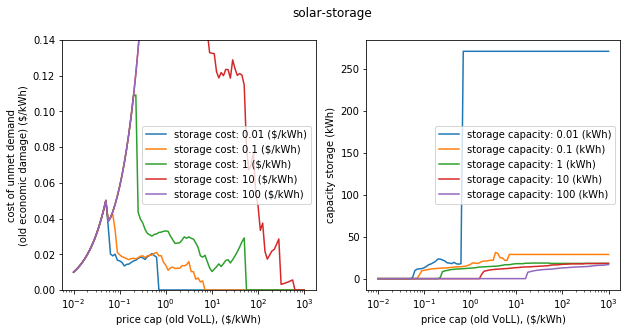

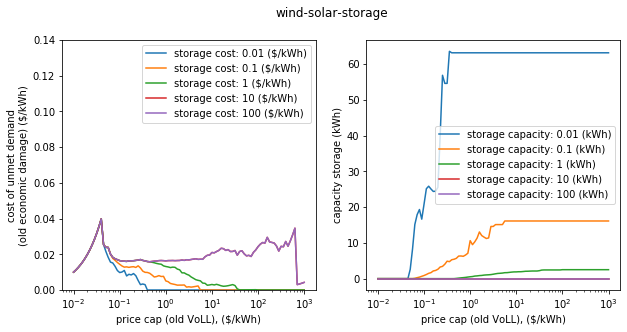

In [3]:
DATE = '20201030'
base = '../Output_Data/10-unmet_demand-solar-storageXXX/10-unmet_demand-solar-storageXXX_'
plot(base, DATE, 'solar-storage')

DATE = '20201029'
base = '../Output_Data/9-unmet_demand-wind-solar-storageXXX/9-unmet_demand-wind-solar-storageXXX_'
plot(base, DATE, 'wind-solar-storage')